# Sleep Efficiency Dataset 수면 효율 분석

# 가설 목록

## 가설
1. 젊을 수록 수면 효율이 높을 것이다.
2. 일찍 취침할 수록 수면 효율이 높을 것이다.
3. 카페인을 적게 마실수록 수면 효율이 높을 것이다.
4. 알코올을 적게 마실수록 수면 효율이 높을 것이다.
5. 비흡연자가 수면 효율이 높을 것이다.
6. 운동을 자주 할 수록 수면 높을것이다.


# 라이브러리 불러오기

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic  
import scipy.stats as spst

# 데이터 불러오기

In [8]:
data = pd.read_csv('Sleep_Efficiency.csv')

# 데이터 확인

In [10]:
# 데이터 상위 5개 확인
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [11]:
data.shape

(452, 15)

In [12]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

1. ID: 각 시험 과목에 대한 고유 식별자
2. Age: 피험자의 연령
3. Gender: 남성 또는 여성
4. Bedtime: 피험자가 매일 밤 잠자리에 드는 시간
5. Wakeup time: 피험자가 매일 아침 깨어나는 시간
6. Sleep duration: 피험자가 수면을 취한 총 시간
7. Sleep efficiency:  침대에서 보낸 시간 중 실제로 수면에 소요된 시간의 비율
8. REM sleep percentage: 렘수면에 소요된 총 수면 시간의 백분율
9. Deep sleep percentage: 깊은 숙면에 소요된 총 수면 시간의 백분율
10. Light sleep percentage: 가벼운 수면에 소요된 총 수면 시간의 백분율
11. Awakenings**: 피험자가 밤에 깨어나는 횟수
12. Caffeine consumption: 취침 전 24시간 동안 섭취한 카페인의 양(mg)
13. Alcohol consumption: 취침 전 24시간 동안 섭취한 알코올의 양(온스)
14. Smoking status: 피험자의 흡연 여부
15. Exercise frequency: 피험자가 매주 운동하는 횟수 

target: Sleep efficiency


- Awakenings / Caffeine consumption / Alcohol consumption / Smoking status /Exercise frequency 결측치 확인

## target 변수 확인 및 기준 설정

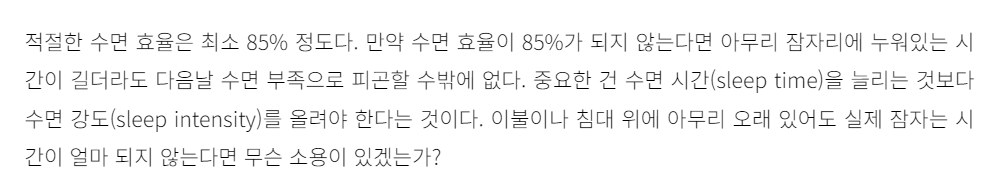
- 참조: https://www.psychiatricnews.net/news/articleView.html?idxno=22169

In [17]:
data[['Sleep efficiency']].describe()

,Sleep efficiency
count,452.000000
mean,0.788916
std,0.135237
min,0.500000
25%,0.697500
50%,0.820000
75%,0.900000
max,0.990000


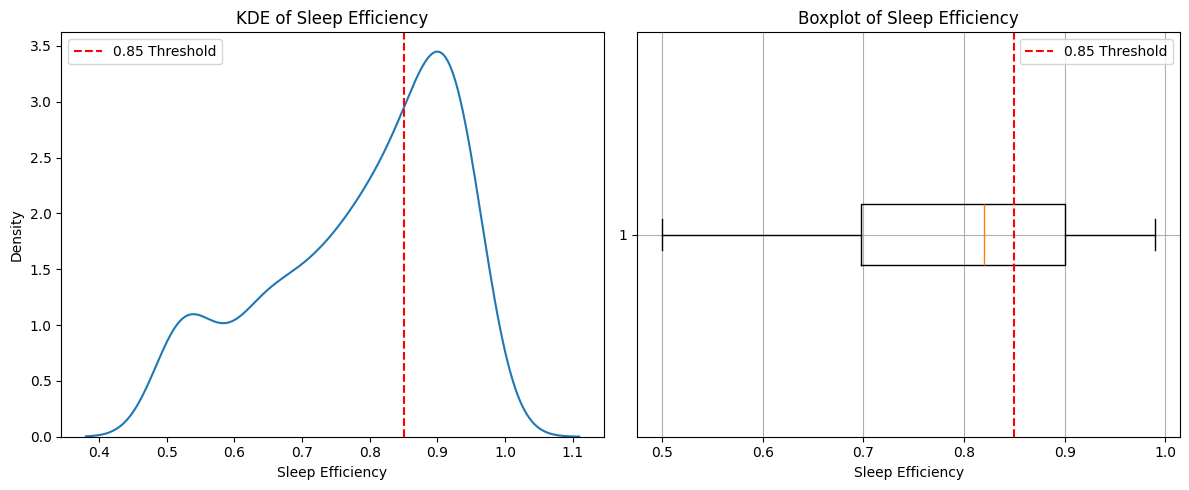

In [18]:
# 서브 플롯 설정
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# KDE 플롯
sns.kdeplot(data['Sleep efficiency'], ax=axs[0])
axs[0].set_title('KDE of Sleep Efficiency')
axs[0].set_xlabel('Sleep Efficiency')
axs[0].set_ylabel('Density')

# 0.85 기준선 추가
axs[0].axvline(x=0.85, color='r', linestyle='--', label='0.85 Threshold')
axs[0].legend()

# 박스 플롯
axs[1].boxplot(data['Sleep efficiency'], vert=False)
axs[1].set_title('Boxplot of Sleep Efficiency')
axs[1].set_xlabel('Sleep Efficiency')
axs[1].grid()

# 0.85 기준선 추가
axs[1].axvline(x=0.85, color='r', linestyle='--', label='0.85 Threshold')
axs[1].legend()

# 플롯 표시
plt.tight_layout()
plt.show()


# 가설 검증

## 고민!
1. 이변량: 수치->수치로 검증
2. 이변량: 수치->범주로 검증 (85% 이상: 1(True)/0(False)로 범주화 할 것인지?)

- 고민이니까 둘 다 한다!

- 고민해결! 범주화했을 때, 높은 수면 효율로 판단!

In [21]:
# 범주화
data['High Sleep Efficiency'] = np.where(data['Sleep efficiency']>=0.85,1,0)

In [22]:
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,High Sleep Efficiency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,1
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,1
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,0


In [23]:
# 범주 개수 확인
data['High Sleep Efficiency'].value_counts()

High Sleep Efficiency
0    251
1    201
Name: count, dtype: int64

In [24]:
# 범주 비율 확인
data['High Sleep Efficiency'].value_counts() / len(data['High Sleep Efficiency'])

High Sleep Efficiency
0    0.55531
1    0.44469
Name: count, dtype: float64

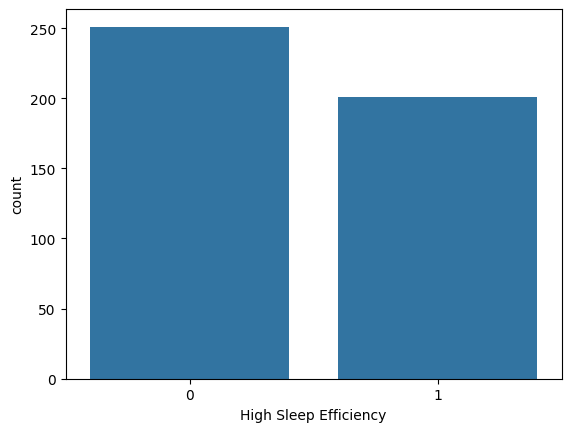

In [25]:
sns.countplot(x='High Sleep Efficiency', data=data)
plt.show()

## 1. 젊을수록 수면 효율이 높을 것이다. 
- Feature: 'Age'
- Target: 'Sleep efficiency'

### 1) 수치 -> 수치

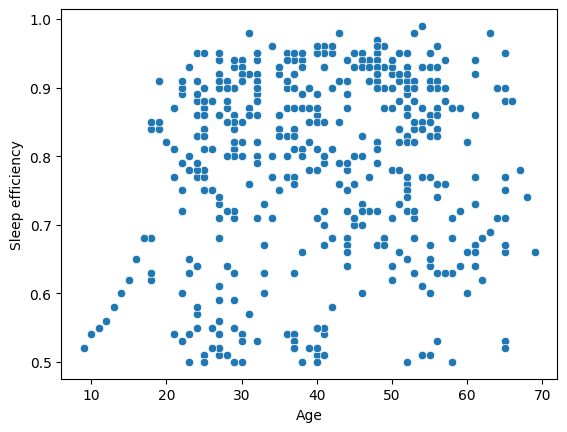

In [28]:
sns.scatterplot( x='Age', y='Sleep efficiency', data = data)
plt.show()

- scatter plot 상으로는 유의미한 관계를 확인하기 어렵다!

In [30]:
spst.pearsonr(data['Age'], data['Sleep efficiency'])

PearsonRResult(statistic=0.09835669021700894, pvalue=0.03658434926283932)

- 나이와 수면 효율간에는 유의미하지만 매우 약한 양의 상관 관계를 가진다. 

### 2) 수치 -> 범주

In [33]:
temp = data[['Age','High Sleep Efficiency']]

In [34]:
# 길어서 target으로 변수 선언
target ='High Sleep Efficiency'

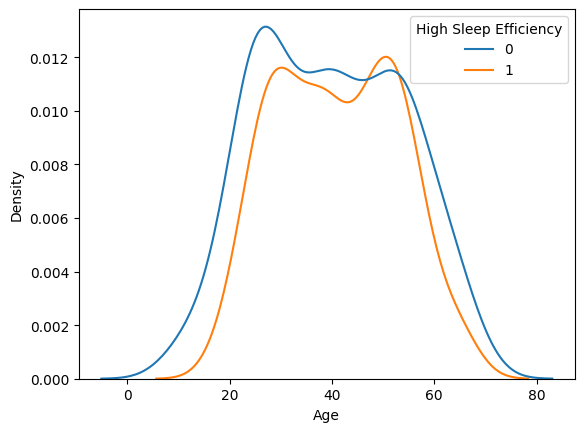

In [35]:
sns.kdeplot(x='Age', data = data, hue =target)
plt.show()

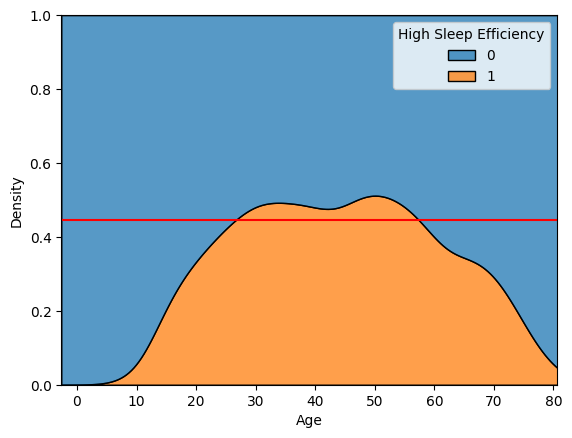

In [36]:
sns.kdeplot(x='Age', data = data, hue = target, multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

- 20대 후반까지는 "높은" 수면 효율 비율이 낮다.
- 20대 후반부터 50대 후반까지 "높은" 수면 효율이 높다
- 50대 후반부터는 "높은" 수면 효율이 감소하는 경향을 보인다

* 사실 청년층, 노년층 세대별로 나눠 범주 -> 범주도 가능하다...
* 양이 많아서 봐준다.

## 2. 일찍 취침할 수록 수면 효율이 높을 것이다.
- Feature: 'Bedtime'
- Target: 'Sleep efficiency'

In [40]:
# 데이터 확인
data['Bedtime']

0      2021-03-06 01:00:00
1      2021-12-05 02:00:00
2      2021-05-25 21:30:00
3      2021-11-03 02:30:00
4      2021-03-13 01:00:00
              ...         
447    2021-11-13 22:00:00
448    2021-03-31 21:00:00
449    2021-09-07 23:00:00
450    2021-07-29 21:00:00
451    2021-03-17 02:30:00
Name: Bedtime, Length: 452, dtype: object

In [41]:
# object -> datetime
data['Bedtime'] = pd.to_datetime(data['Bedtime'])

In [42]:
data['Bedtime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Bedtime
Non-Null Count  Dtype         
--------------  -----         
452 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.7 KB


In [43]:
# 시간만 추출
data['Time']=data['Bedtime'].dt.time

In [44]:
data['Time']

0      01:00:00
1      02:00:00
2      21:30:00
3      02:30:00
4      01:00:00
         ...   
447    22:00:00
448    21:00:00
449    23:00:00
450    21:00:00
451    02:30:00
Name: Time, Length: 452, dtype: object

In [45]:
# 시간대 정렬
sorted_times = sorted(data['Time'], key=lambda x: (x.hour, x.minute, x.second))

### 범주 -> 수치 (1)

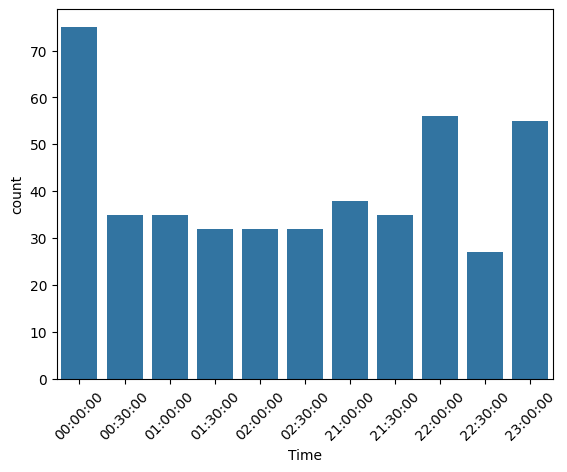

In [47]:
# 시간대 분포 확인
sns.countplot(x='Time', data=data, order=sorted_times)
plt.xticks(rotation=45)
plt.show()

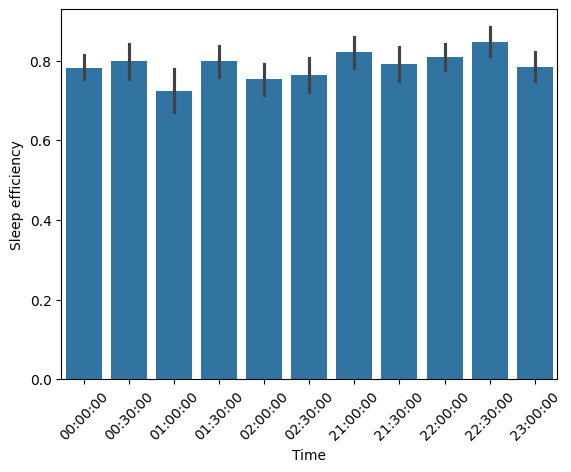

In [48]:
# 취침 시간과 수면효율간 관계확인
sns.barplot(x='Time',y='Sleep efficiency',data=data ,order=sorted_times)
plt.xticks(rotation=45)
plt.show()

- 수면시간에 따라 수면효율에 차이가 있다고 보기 어렵다.
- 변수가 너무 많기 때문에 시간단위로 범주화 (데이터 간소화)

### 범주 -> 수치 (2)

In [51]:
# 취침 "시간"만 추출
data['Hour']=data['Bedtime'].dt.hour

In [52]:
# 개수 확인
data['Hour'].value_counts()

Hour
0     110
22     83
21     73
1      67
2      64
23     55
Name: count, dtype: int64

In [53]:
# 비율 확인
data['Hour'].value_counts()/ len(data['Hour'])

Hour
0     0.243363
22    0.183628
21    0.161504
1     0.148230
2     0.141593
23    0.121681
Name: count, dtype: float64

In [54]:
# 시간 순서대로 정렬할 리스트 생성
sorted_hours = [21, 22, 23, 0, 1, 2]

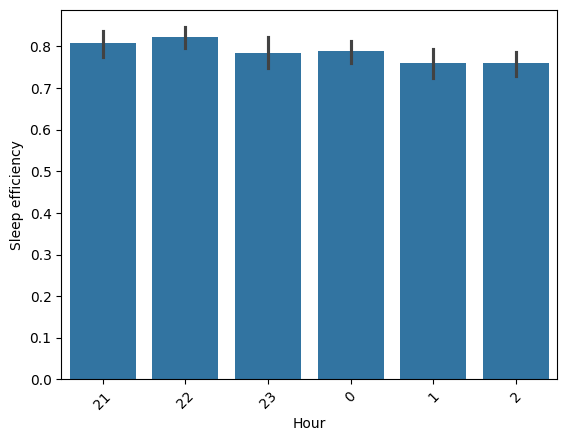

In [55]:
sns.barplot(x='Hour',y='Sleep efficiency',data=data, order=sorted_hours)
plt.xticks(rotation=45)
plt.show()

- 여전히 그래프 상 수면시간에 따라 수면효율에 차이가 있다고 보기 어렵다.

### 범주 -> 수치 (3): - 2번 anova 진행

In [58]:
# 취침시간과 수면효율(범주)간 교차표
pd.crosstab(data[target], data['Hour'])

Hour,0,1,2,21,22,23
High Sleep Efficiency,,,,,,
0,61,41,46,40,38,25
1,49,26,18,33,45,30


In [59]:
data['Hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Hour
Non-Null Count  Dtype
--------------  -----
452 non-null    int32
dtypes: int32(1)
memory usage: 1.9 KB


In [60]:
# 1) 분산 분석을 위한 데이터 만들기
# NaN 행 제외
temp = data.loc[data['Sleep efficiency'].notnull()]
# 그룹별 저장
h_21 = temp.loc[temp.Hour == 21, 'Sleep efficiency']
h_22 = temp.loc[temp.Hour == 22, 'Sleep efficiency']
h_23 = temp.loc[temp.Hour == 23, 'Sleep efficiency']
h_0 = temp.loc[temp.Hour == 0, 'Sleep efficiency']
h_1 = temp.loc[temp.Hour == 1, 'Sleep efficiency']
h_2 = temp.loc[temp.Hour == 2, 'Sleep efficiency']

In [61]:
spst.f_oneway(h_21, h_22, h_23, h_0, h_1, h_2)

F_onewayResult(statistic=2.617004452222998, pvalue=0.023947938815406137)

- F통계량은 2.61, p-value는 0.02 로 변수들 간 유의미한 차이가 있다.
- 사후분석 필요!

### 범주 -> 범주

In [64]:
table = pd.crosstab(data['Hour'],data[target])
table

High Sleep Efficiency,0,1
Hour,,
0,61,49
1,41,26
2,46,18
21,40,33
22,38,45
23,25,30


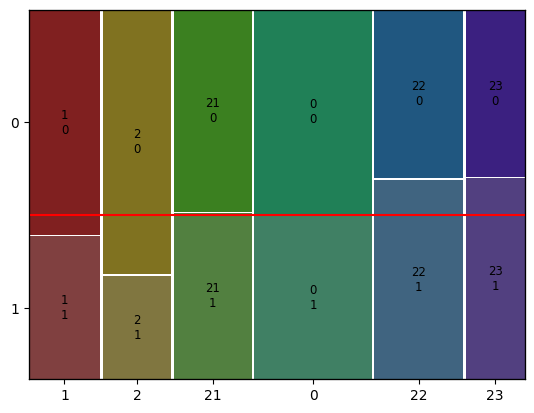

In [65]:
mosaic(data, ['Hour',target])
plt.axhline(data[target].mean(),color='r')
plt.show()

- 취침 시간과 "높은" 수면 효율 간에는 유의미한 차이가 있는 것으로 보인다.

In [67]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 13.264782920494815
p-value 0.021019867231170237
자유도 5


- 카이제곱 통계량이 13.2로 자유도의 2배 이상이고, p-value 또한 0.05 보다 작다
- 취침 시간에 따라 "높은" 수면 효율은 유의미한 차이가 있는 것으로 보인다.

## 3. 카페인을 적게 마실수록 수면 효율이 높을 것이다.
- Feature: 'Caffeine consumption'
- Target: 'Sleep efficiency'

### 결측치 처리

In [71]:
# 결측치 존재 한번 더 확인
data['Caffeine consumption'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Caffeine consumption
Non-Null Count  Dtype  
--------------  -----  
427 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [72]:
data['Caffeine consumption'].value_counts()

Caffeine consumption
0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: count, dtype: int64

In [73]:
data['Caffeine consumption'].describe()

count    427.000000
mean      23.653396
std       30.202785
min        0.000000
25%        0.000000
50%       25.000000
75%       50.000000
max      200.000000
Name: Caffeine consumption, dtype: float64

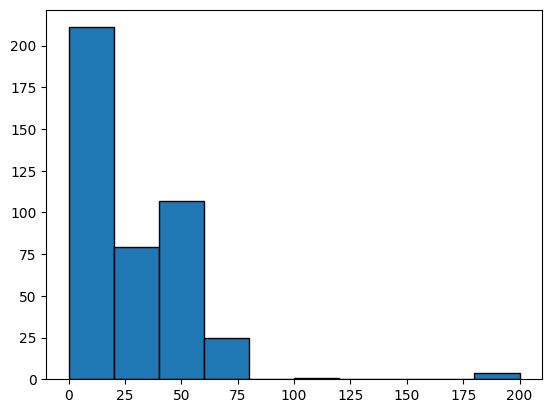

In [74]:
plt.hist(x='Caffeine consumption', data = data ,edgecolor = 'black')
plt.show()

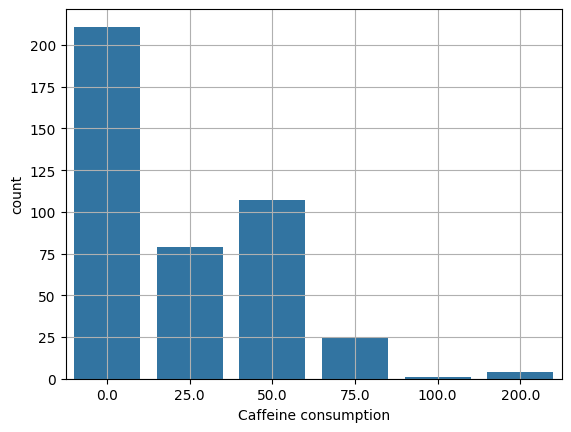

In [75]:
sns.countplot(x='Caffeine consumption', data=data)
plt.grid()
plt.show()

In [76]:
data[['Caffeine consumption',target]].loc[data['Caffeine consumption'].isna()]

,Caffeine consumption,High Sleep Efficiency
5,NaN,1
24,NaN,1
26,NaN,1
37,NaN,0
57,NaN,1
60,NaN,1
63,NaN,1
64,NaN,1
114,NaN,1
136,NaN,1


In [77]:
len(data[['Caffeine consumption',target]].loc[data['Caffeine consumption'].isna()])

25

- 결측치 중앙값:
- 중앙값은 극단값에 덜 민감하기 떄문에

In [79]:
data['Caffeine consumption'] = data['Caffeine consumption'].fillna(data['Caffeine consumption'].median())

In [80]:
data['Caffeine consumption'].isna().sum()

0

### 기준 설정

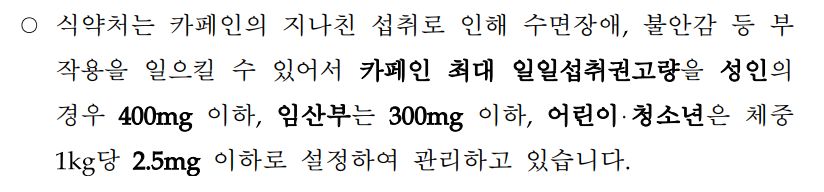
- https://www.mfds.go.kr/brd/m_99/down.do?brd_id=ntc0021&seq=44023&data_tp=A&file_seq=2

- 섭취권고량과 현재 자료의 범위가 많이 벗어나기 때문에 카페인 섭취 유무로 범주화 진행

In [84]:
# 범주화
data['Caffeine_category'] = np.where(data['Alcohol consumption'] == 0.0, 0, 1)

In [85]:
data['Caffeine_category'].value_counts()

Caffeine_category
0    246
1    206
Name: count, dtype: int64

### 범주 -> 수치

<Axes: xlabel='Caffeine_category', ylabel='Sleep efficiency'>

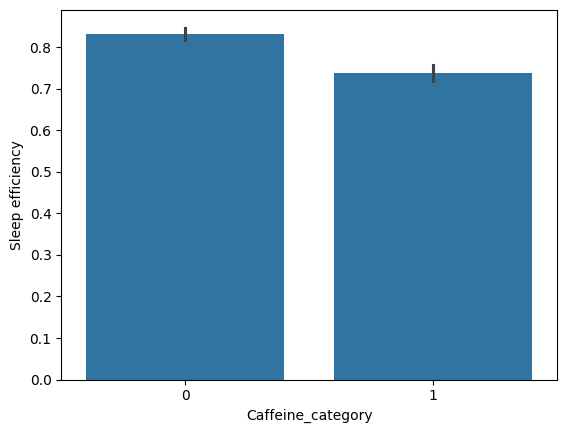

In [87]:
sns.barplot(x='Caffeine_category' ,y='Sleep efficiency', data=data)

- 그래프 상으로 카페인을 섭취하는 그룹과 그렇지 않은 그룹의 차이가 있다고 보기 어렵다
- t-test 진행

In [89]:
take = data.loc[data['Caffeine_category']==1,'Sleep efficiency']
n_take = data.loc[data['Caffeine_category']==0,'Sleep efficiency']

In [90]:
spst.ttest_ind(n_take,take)

TtestResult(statistic=7.894725488059029, pvalue=2.2417783374480188e-14, df=450.0)

- p-value가 매우 작은 값으로 통계적으로 유의미한 것으로 보인다.

<Axes: xlabel='Caffeine consumption', ylabel='Sleep efficiency'>

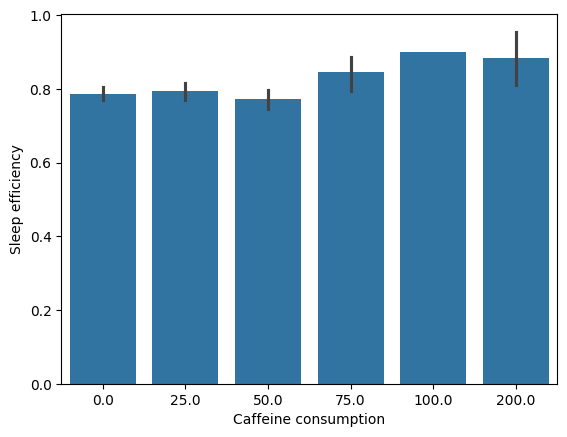

In [92]:
sns.barplot(x='Caffeine consumption' ,y='Sleep efficiency', data=data)

In [93]:
data.loc[data['Caffeine consumption']==100]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,High Sleep Efficiency,Time,Hour,Caffeine_category
111,112,25,Male,2021-10-26 23:00:00,2021-10-26 06:00:00,7.0,0.9,20,65,15,0.0,100.0,0.0,No,3.0,1,23:00:00,23,0


- 카페인 섭취량이 100인 사람은 단 1명!
- 해석이 어려워서 바로 아노바 진행!

In [95]:
# NaN 행 제외
temp = data.loc[data['Sleep efficiency'].notnull()]
temp.head()
# 그룹별 저장
c_0 = temp.loc[temp['Caffeine consumption'] == 0.0, 'Sleep efficiency']
c_25 = temp.loc[temp['Caffeine consumption'] == 25.0, 'Sleep efficiency']
c_50 = temp.loc[temp['Caffeine consumption'] == 50.0, 'Sleep efficiency']
c_75 = temp.loc[temp['Caffeine consumption'] == 75.0, 'Sleep efficiency']
c_100= temp.loc[temp['Caffeine consumption'] == 100.0, 'Sleep efficiency']
c_200= temp.loc[temp['Caffeine consumption'] == 200.0, 'Sleep efficiency']
# 하면서 느낀점: 사전에 int 타입으로 변경할걸..

In [96]:
spst.f_oneway(c_0, c_25, c_50, c_75, c_100, c_200)

F_onewayResult(statistic=1.809487614063499, pvalue=0.10958669491882843)

- F통계량이 2를 넘지 않고, 유의사항 0.05 에서 pvalue가 더 크므로 카페인 섭취와 수면효율간에는 유의미한 차이가 없다.

### 범주 -> 범주 

In [99]:
table = pd.crosstab(data['Caffeine consumption'],data[target])
table

High Sleep Efficiency,0,1
Caffeine consumption,,
0.0,122,89
25.0,60,44
50.0,60,47
75.0,7,18
100.0,0,1
200.0,2,2


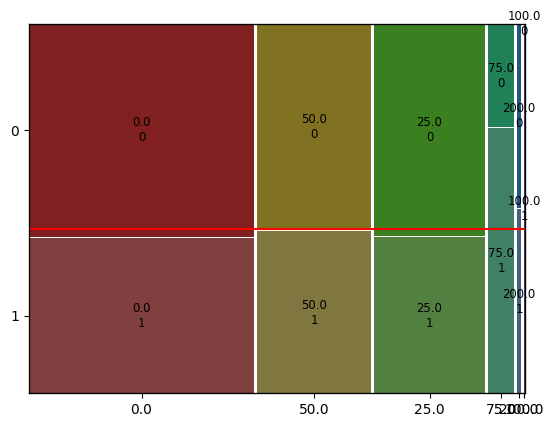

In [100]:
mosaic(data, ['Caffeine consumption',target])
plt.axhline(data[target].mean(),color='r')
plt.show()

- 전체 평균 비율과 차이가 근소하기 떄문에 카페인 섭취에 따라 수면 효율에 유의미한 차이가 존재하지 않는 것으로 보인다.

In [102]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 9.628968179779305
p-value 0.08645735302547362
자유도 5


- 카이제곱통계량이 자유도의 2배(10)를 넘지 않고, p-value 또한 0.05보다 크기 때문에 카페인 섭취와 수면 효율 간 관계가 있다고 보기 어렵다.

In [104]:
table = pd.crosstab(data['Caffeine_category'],data[target])
table

High Sleep Efficiency,0,1
Caffeine_category,,
0,112,134
1,139,67


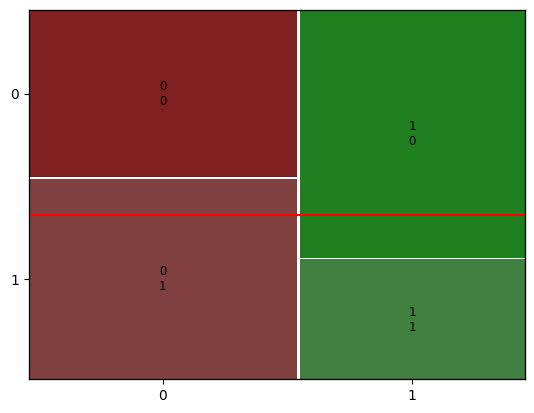

In [105]:
mosaic(data, ['Caffeine_category',target])
plt.axhline(data[target].mean(),color='r')
plt.show()

In [106]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 20.989423850573715
p-value 4.6182574537463e-06
자유도 1


- 카이제곱통계량이 자유도의 2배(2)를 넘고, p-value 또한 0.05보다 작기 때문에 카페인 섭취와 수면 효율 간 관계가 있다고 봐야한다.

## 4. 알코올을 적게 마실수록 수면 효율이 높을 것이다.
- Feature: 'Alcohol consumption'
- Target: 'Sleep efficiency'

### 결측치 처리

In [110]:
# 결측치 존재 한번 더 확인
data['Alcohol consumption'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Alcohol consumption
Non-Null Count  Dtype  
--------------  -----  
438 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [111]:
data['Alcohol consumption'].describe()

count    438.000000
mean       1.173516
std        1.621377
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: Alcohol consumption, dtype: float64

In [112]:
data['Alcohol consumption'].value_counts()

Alcohol consumption
0.0    246
1.0     54
3.0     48
2.0     37
5.0     30
4.0     23
Name: count, dtype: int64

In [113]:
data['Alcohol consumption'].mode()

0    0.0
Name: Alcohol consumption, dtype: float64

In [114]:
# 결측치를 최빈값으로 채우기
data['Alcohol consumption'].fillna(data['Alcohol consumption'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14036\1975296955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Alcohol consumption'].fillna(data['Alcohol consumption'].mode()[0], inplace=True)


In [115]:
data['Alcohol consumption'] = data['Alcohol consumption'].astype(int)

In [116]:
data['Alcohol consumption'].isna().sum()

0

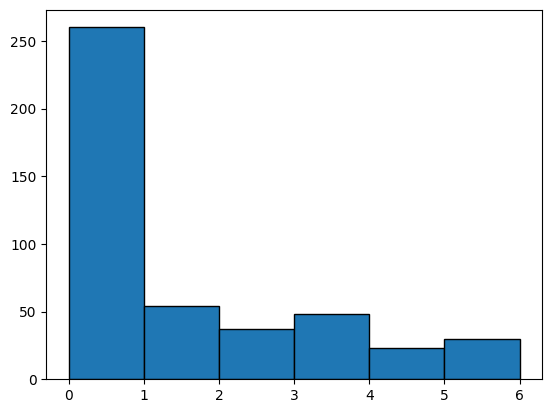

In [117]:
plt.hist(x='Alcohol consumption', data = data ,edgecolor = 'black',bins= [0,1,2,3,4,5,6])
plt.show()

### 범주 -> 수치

<Axes: xlabel='Alcohol consumption', ylabel='Sleep efficiency'>

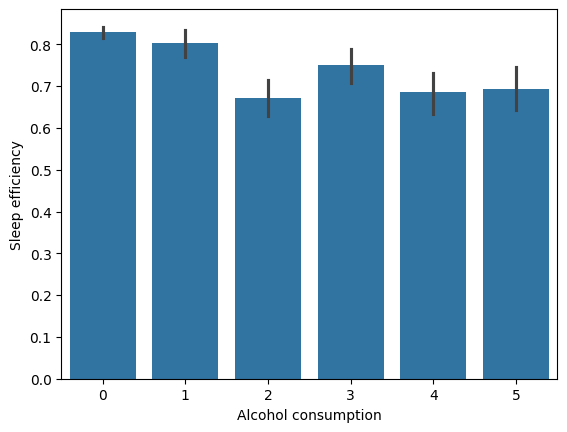

In [119]:
sns.barplot(x='Alcohol consumption' ,y='Sleep efficiency', data=data)

- 0,1,2 온스까지는 차이가 있는것으로 보이고, 3,4,5 온스는 차이가 있다고 보기 어렵다

In [121]:
# NaN 행 제외
temp = data.loc[data['Sleep efficiency'].notnull()]
temp.head()
# 그룹별 저장
a_0 = temp.loc[temp['Alcohol consumption'] == 0, 'Sleep efficiency']
a_1 = temp.loc[temp['Alcohol consumption'] == 1, 'Sleep efficiency']
a_2 = temp.loc[temp['Alcohol consumption'] == 2, 'Sleep efficiency']
a_3 = temp.loc[temp['Alcohol consumption'] == 3, 'Sleep efficiency']
a_4 = temp.loc[temp['Alcohol consumption'] == 4, 'Sleep efficiency']
a_5 = temp.loc[temp['Alcohol consumption'] == 5, 'Sleep efficiency']
# 하면서 느낀점: 사전에 int 타입으로 변경할걸..

In [122]:
spst.f_oneway(a_0, a_1, a_2, a_3, a_4, a_5)

F_onewayResult(statistic=20.75743486342888, pvalue=1.1670730375075132e-18)

- F통계량이 크고 p-value가 매우 작으므로, 알콜섭취와 수면효율 간 통계적으로 유의미한 차이가 존재한다

- 알콜섭취 vs 알콜섭취 x

In [125]:
data['Alcohol_category'] = np.where(data['Alcohol consumption'] == 0, 0, 1)

In [126]:
data['Alcohol_category'].value_counts()

Alcohol_category
0    260
1    192
Name: count, dtype: int64

<Axes: xlabel='Alcohol_category', ylabel='Sleep efficiency'>

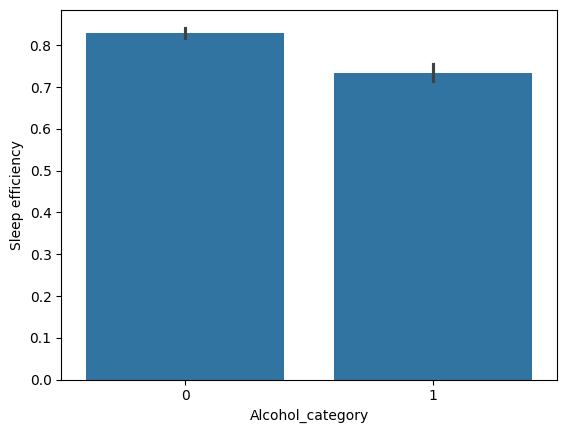

In [127]:
sns.barplot(x='Alcohol_category' ,y='Sleep efficiency', data=data)

- 그래프 상으로 알콜 섭취하는 그룹과 섭취하지 않는 그룹 간의 유의미한 차이가 있음을 확인할 수 있다.

In [129]:
take = data.loc[data['Alcohol_category']==1,'Sleep efficiency']
n_take = data.loc[data['Alcohol_category']==0,'Sleep efficiency']

In [130]:
spst.ttest_ind(n_take,take)

TtestResult(statistic=8.009946764059336, pvalue=9.916513853386906e-15, df=450.0)

- t통계량은 8, p-value는 9.916513853386906e-15로 굉장히 작은 값으로, 알콜 섭취하는 그룹과 섭취하지 않는 그룹 간의 유의미한 차이가 있음을 확인할 수 있다.

### 범주 -> 범주

In [133]:
table = pd.crosstab(data['Alcohol consumption'],data[target])
table

High Sleep Efficiency,0,1
Alcohol consumption,,
0,120,140
1,28,26
2,30,7
3,30,18
4,20,3
5,23,7


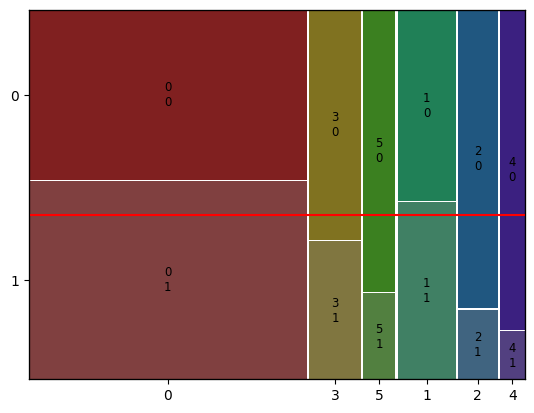

In [134]:
mosaic(data, ['Alcohol consumption',target])
plt.axhline(data[target].mean(),color='r')
plt.show()

- 전체 평균 비율과 차이가 나기 떄문에 알콜 섭취에 따라 "높은" 수면 효율에 유의미한 차이가 존재하는 것으로 보인다.

In [136]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 34.90452523268557
p-value 1.5721247821293913e-06
자유도 5


- 카이제곱통계량이 자유도의 2배(10)를 넘고, p-value 또한 0.05보다 작기 때문에 알코올 섭취와 "높은" 수면 효율 간 관계가 있다고 볼 수 있다. 

In [138]:
table = pd.crosstab(data['Alcohol_category'],data[target])
table

High Sleep Efficiency,0,1
Alcohol_category,,
0,120,140
1,131,61


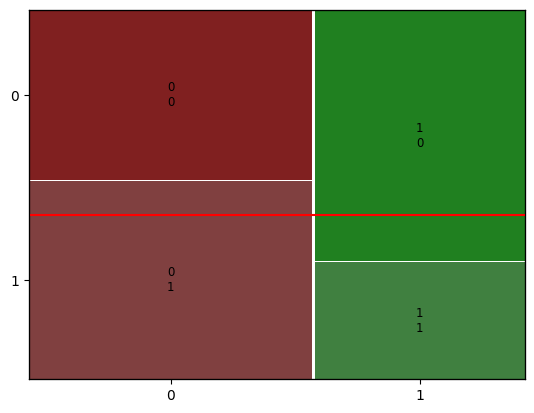

In [139]:
mosaic(data, ['Alcohol_category',target])
plt.axhline(data[target].mean(),color='r')
plt.show()

In [140]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 20.91023466409906
p-value 4.813160825586504e-06
자유도 1


- 카이제곱통계량이 자유도의 2배(2)를 넘고, p-value 또한 0.05보다 작기 때문에 알코올 섭취와 "높은" 수면 효율 간 관계가 있다고 볼 수 있다. 

## 5. 비흡연자가 수면 효율이 높을 것이다.
- Feature: 'Smoking status'
- Target: 'Sleep efficiency'

In [143]:
data['Smoking status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Smoking status
Non-Null Count  Dtype 
--------------  ----- 
452 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [144]:
data['Smoking status'].value_counts()

Smoking status
No     298
Yes    154
Name: count, dtype: int64

### 범주 -> 수치

<Axes: xlabel='Smoking status', ylabel='Sleep efficiency'>

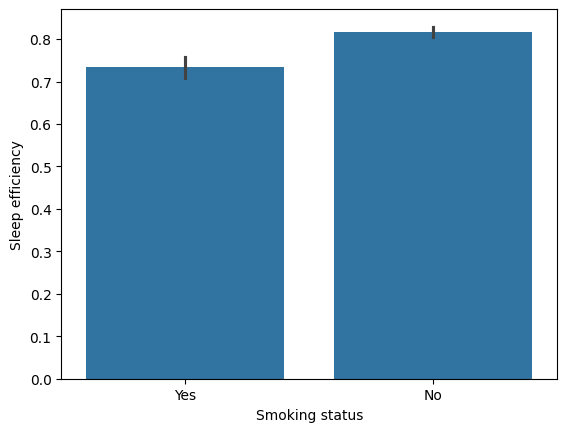

In [146]:
sns.barplot(x='Smoking status' ,y='Sleep efficiency', data=data)

- 그래프 상 흡연 그룹과 비흡연 그룹간 수면효율 차이를 확인 할 수 있다.

In [148]:
smoke = data.loc[data['Smoking status']=='Yes','Sleep efficiency']
n_smoke = data.loc[data['Smoking status']=='No','Sleep efficiency']

In [149]:
spst.ttest_ind(n_smoke,smoke)

TtestResult(statistic=6.4286893157053955, pvalue=3.288310567775705e-10, df=450.0)

- t통계량: 6.42, p-value는 3*e-10으로 흡연여부와 수면 효율간 유의미한 관계가 있다고 볼 수 있다.

### 범주 -> 범주

In [152]:
table = pd.crosstab(data['Smoking status'],data[target])
table

High Sleep Efficiency,0,1
Smoking status,,
No,158,140
Yes,93,61


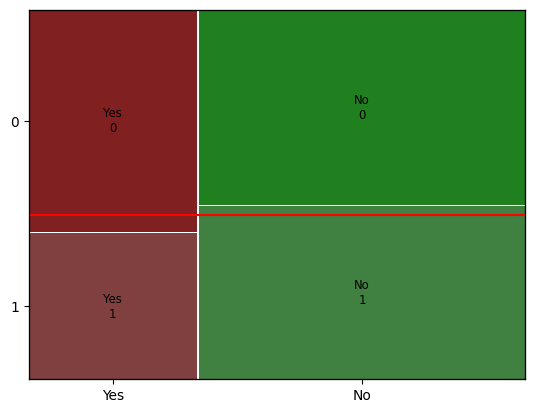

In [153]:
mosaic(data, ['Smoking status',target])
plt.axhline(data[target].mean(),color='r')
plt.show()

In [154]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 1.9444897584236431
p-value 0.16318187126129835
자유도 1


- 흡연 여부와 높은 수면 효율간에는 유의미한 관계가 없다고 볼 수 있다.

## 6. 운동을 자주 할 수록 수면 높을 것이다
- Feature: 'Exercise frequency'
- Target: 'Sleep efficiency'

### 결측치 처리

In [158]:
# 결측치 존재
data['Exercise frequency'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: Exercise frequency
Non-Null Count  Dtype  
--------------  -----  
446 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [159]:
data['Exercise frequency'].describe()

count    446.000000
mean       1.791480
std        1.428134
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Exercise frequency, dtype: float64

In [160]:
data['Exercise frequency'].value_counts()

Exercise frequency
3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: count, dtype: int64

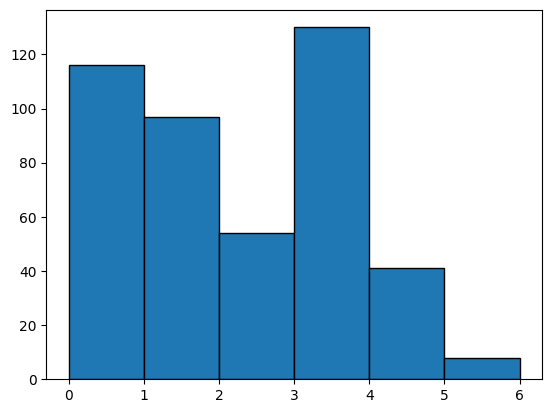

In [161]:
plt.hist(x='Exercise frequency', data = data ,edgecolor = 'black',bins= [0,1,2,3,4,5,6])
plt.show()

<Axes: xlabel='Exercise frequency'>

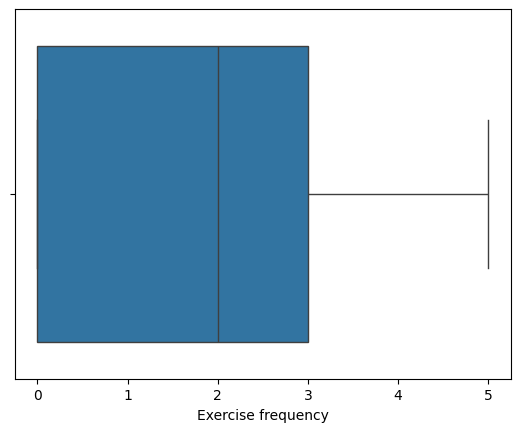

In [162]:
sns.boxplot(x='Exercise frequency', data=data)

In [163]:
# 중위값 2로 결측치 처리
data['Exercise frequency'].fillna(data['Exercise frequency'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14036\1271672911.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Exercise frequency'].fillna(data['Exercise frequency'].median(), inplace=True)


In [164]:
data['Exercise frequency'].isna().sum()

0

In [165]:
data['Exercise frequency'] = data['Exercise frequency'].astype(int)

In [166]:
data['Exercise frequency'].dtype

dtype('int32')

### 범주 -> 수치

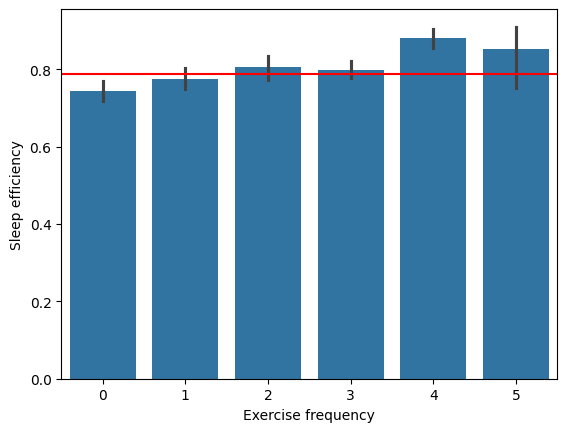

In [168]:
sns.barplot(x='Exercise frequency' ,y='Sleep efficiency', data=data)
plt.axhline(data['Sleep efficiency'].mean(),color='r')

- 그래프 상으로 운동주기와 수면효율간 유의미한 차이가 있다고 보기 어렵다.

In [170]:
# NaN 행 제외
temp = data.loc[data['Sleep efficiency'].notnull()]
temp.head()
# 그룹별 저장
e_0 = temp.loc[temp['Exercise frequency'] == 0, 'Sleep efficiency']
e_1 = temp.loc[temp['Exercise frequency'] == 1, 'Sleep efficiency']
e_2 = temp.loc[temp['Exercise frequency'] == 2, 'Sleep efficiency']
e_3 = temp.loc[temp['Exercise frequency'] == 3, 'Sleep efficiency']
e_4 = temp.loc[temp['Exercise frequency'] == 4, 'Sleep efficiency']
e_5 = temp.loc[temp['Exercise frequency'] == 5, 'Sleep efficiency']
# 하면서 느낀점: 사전에 int 타입으로 변경할걸..

In [171]:
spst.f_oneway(a_0, a_1, a_2, a_3, a_4, a_5)

F_onewayResult(statistic=20.75743486342888, pvalue=1.1670730375075132e-18)

- F통계량이 크고 p-value가 매우 작으므로, 운동 주기와 수면효율 간 통계적으로 유의미한 차이가 존재한다

- 운동 X vs 운동 O

In [174]:
data['Exercise_category'] = np.where(data['Exercise frequency'] == 0, 0, 1)

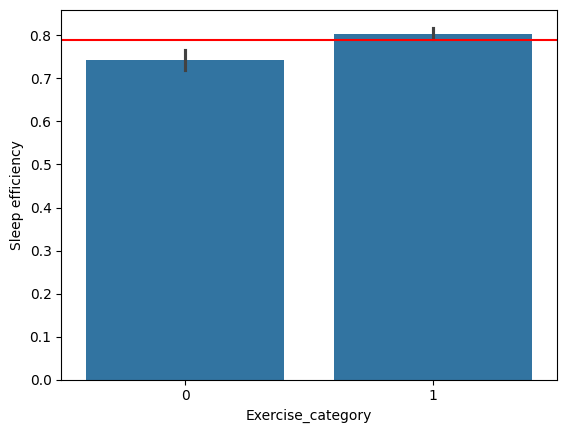

In [175]:
sns.barplot(x='Exercise_category' ,y='Sleep efficiency', data=data)
plt.axhline(data['Sleep efficiency'].mean(),color='r')

- 운동 유무를 그래프로 봤을 때, 유무자체로는 수면효율과 유의미한 차이를 보인다.

In [177]:
exer = data.loc[data['Exercise_category']==1,'Sleep efficiency']
n_exer = data.loc[data['Exercise_category']==0,'Sleep efficiency']

In [178]:
spst.ttest_ind(n_exer,exer)

TtestResult(statistic=-4.2375335176496165, pvalue=2.7428709284160958e-05, df=450.0)

- t통계량이 -2보다 작고 p-value가 0.05보다 작기 때문에 운동 유무와 수면효율간 유의미한 차이가 존재한다.

### 범주 -> 범주

In [181]:
table = pd.crosstab(data['Exercise frequency'],data[target])
table

High Sleep Efficiency,0,1
Exercise frequency,,
0,82,34
1,59,38
2,34,26
3,66,64
4,9,32
5,1,7


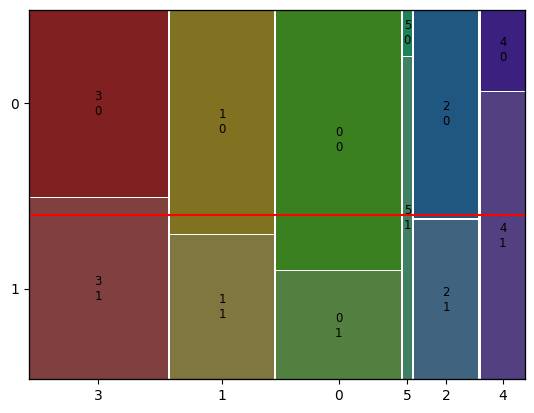

In [182]:
mosaic(data, ['Exercise frequency',target])
plt.axhline(data[target].mean(),color='r')
plt.show()

- 그래프 상으로 운동 회수와 수면 효율 간 유의미한 차이가 있는 것으로 보인다.

In [184]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 37.84040259151632
p-value 4.062274343068775e-07
자유도 5


- 카이제곱통계량이 37.8로 자유도의 2배(10)보다 크고, p-value가 0.05보다 작기 때문에 운동 주기와 높은 수면 효율간 유의미한 차이를 가진다고 볼 수 있다.

In [186]:
table = pd.crosstab(data['Exercise_category'],data[target])
table

High Sleep Efficiency,0,1
Exercise_category,,
0,82,34
1,169,167


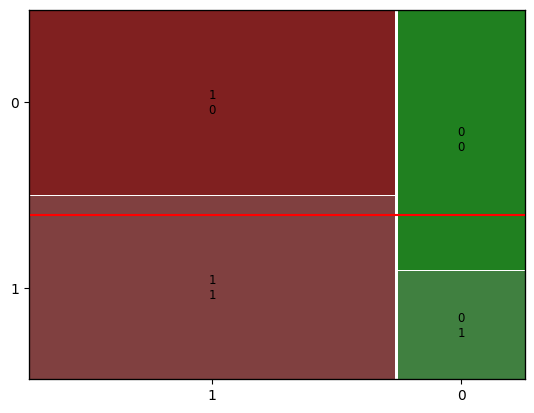

In [187]:
mosaic(data, ['Exercise_category',target])
plt.axhline(data[target].mean(),color='r')
plt.show()

- 그래프 상으로 운동 유무와 높은 수면 효율 간 차이가 있는 것으로 확인된다.

In [189]:
# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])

카이제곱통계량 13.706639290935659
p-value 0.00021369768653423546
자유도 1


- 카이제곱 통계량이 13.7로 자유도의 2배 이상이고, p-value 또한 0.05보다 작기 때문에 운동 유무와 높은 수면 효율 간 유의미한 차이를 가진다고 할 수 있다.

# 결과

1. 나이

    1) 나이와 수면 효율간 매우 낮은 양의 상관관계
    2) 나이와 높은 수면 효율
        - 20대 후반까지는 "높은" 수면 효율 비율이 낮다.
        - 20대 후반부터 50대 후반까지 "높은" 수면 효율이 높다
        - 50대 후반부터는 "높은" 수면 효율이 감소하는 경향을 보인다

<br>       

2. 취침 시간

    1) 취침 시간과 수면 효율 간 유의미한 차이가 있다. (사후 분석 필요!)
    2) 취침 시간과 높은 수면 효율간 유의미한 차이가 있다.

<br>

3. 카페인 섭취
    1) 카페인 섭취 유무와 수면 효율 간 유의미한 차이가 없다.
    2) 카페인 섭취량과 수면 효율 간 유의미한 차이가 없다. 
    3) 카페인 섭취량과 "높은" 수면 효율 간에도 유의미한 차이가 없다.
    4) 카페인 섭취 유무와 "높은" 수면 효율 간에도 유의미한 차이가 없다.

<br>

4. 알코올 섭취
    1) 알코올 섭취량과 수면 효율 간 유의미한 차이를 보인다.
    2) 알코올 섭취 유무 또한 수면 효율 간 유의미한 차이를 보인다.
    3) 알코올 섭취량과 "높은" 수면 효율 간 유의미한 차이를 보인다.
    4) 알코올 섭취 유무 또한 "높은" 수면 효율 간 유의미한 차이을 보인다.

<br>

5. 흡연 유무
    1) 흡연 유무와 수면 효율 간 유의미한 차이를 보인다
    2) 흡연 유무와 "높은" 수면 효율 간에는 유의미한 차이를 보이지 않는다.

<br>

6. 운동
    1) 운동 주기와 수면 효율 간 유의미한 차이가 존재한다.
    2) 운동 유무와 수면 효율 간 유의미한 차이가 존재한다.
    3) 운동 주기와 "높은" 수면 효율 간 유의미한 차이가 존재한다.
    4) 운동 유무와 "높은" 수면 효율 간 유의미한 차이가 존재한다.

- 취침 시간과 수면 효율은 유의미한 관계를 가지나 어떤 관계를 가지는지 사후 분석이 필요하다
- 취침 시간과 0.85 이상의 높은 수면 효율에서는 취침 시간이 이를수록 그 비율이 컸다.
- 수면 효율을 높이기 위해서 알코올 섭취를 줄이고, 운동 주기를 늘려야할 것으로 보인다.
- 금연 또한 수면 효율을 높이는데 의미가 있지만, 0.85이상의 높은 수면 효율에서는 크게 의미가 없는 것으로 보인다.